In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Read data.

In [2]:
medical_df = pd.read_csv("medical_examination.csv")

medical_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##### Add 'overweight' column.

In [3]:
medical_df["overweight"] = 0
medical_df["overweight"] = np.where(medical_df["weight"] / ((medical_df["height"] / 100) ** 2) > 25, 1, 0)

medical_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


##### Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [4]:
medical_df_normalized = medical_df.copy()

medical_df_normalized.loc[medical_df_normalized["cholesterol"] == 1, "cholesterol"] = 0
medical_df_normalized.loc[medical_df_normalized["cholesterol"] > 1, "cholesterol"] = 1

medical_df_normalized.loc[medical_df_normalized["gluc"] == 1, "gluc"] = 0
medical_df_normalized.loc[medical_df_normalized["gluc"] > 1, "gluc"] = 1

medical_df_normalized.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


##### Create DataFrame for cat plot using 'pd.melt' using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [5]:
medical_df_cat = pd.melt(medical_df_normalized, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight", "cardio"])

medical_df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


##### Group and reformat the data to split it by 'cardio'. Show the counts of each feature.

In [6]:
medical_df_cat["total"] = 1
medical_df_cat = medical_df_cat.groupby(["cardio", "variable", "value"], as_index=False).count()

medical_df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


##### Draw the catplot with 'sns.catplot()'.

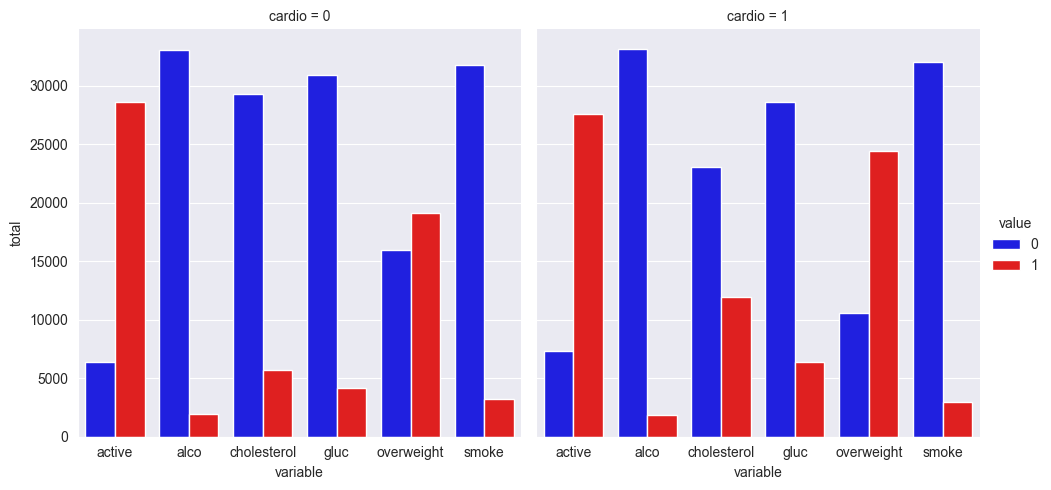

In [7]:
sns.catplot(
    x="variable",
    y="total",
    hue="value",
    kind="bar",
    palette=["blue", "red"],
    data=medical_df_cat,
    col="cardio",
)

plt.show()

##### Clean the data.

In [8]:
medical_df = medical_df[medical_df["ap_lo"] <= medical_df["ap_hi"]]

height_percentage_low = medical_df["height"].quantile(0.025)
height_percentage_high = medical_df["height"].quantile(0.975)
weight_percentage_low = medical_df["weight"].quantile(0.025)
weight_percentage_high = medical_df["weight"].quantile(0.975)

medical_df = medical_df[(medical_df["height"] >= height_percentage_low) & (medical_df["height"] <= height_percentage_high)]

medical_df = medical_df[(medical_df["weight"] >= weight_percentage_low) & (medical_df["weight"] <= weight_percentage_high)]

medical_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


##### Calculate the correlation matrix.

In [9]:
correlation_matrix = medical_df.corr(method="pearson")

##### Generate a mask for the upper triangle.

In [10]:
mask = np.triu(correlation_matrix)

##### Draw the heatmap with 'sns.heatmap()'.

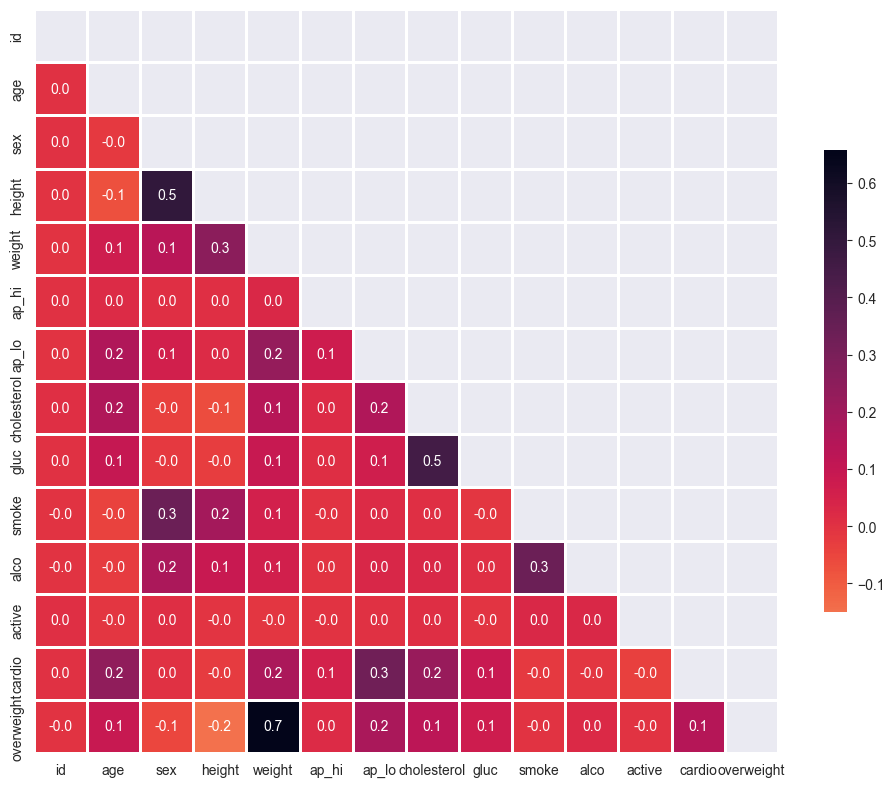

In [11]:
figure, axes = plt.subplots(figsize=(12, 12))

sns.heatmap(
    correlation_matrix,
    linewidths=1,
    annot=True,
    square=True,
    mask=mask,
    fmt=".1f",
    center=0.08,
    cbar_kws={"shrink": 0.5},
    cmap="rocket_r",
)

plt.show()